In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [11]:
df = pd.read_excel('EastWestAirlines.xlsx'  ,sheet_name = 'data' )

In [23]:
df.shape

(3999, 12)

In [15]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [17]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [19]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


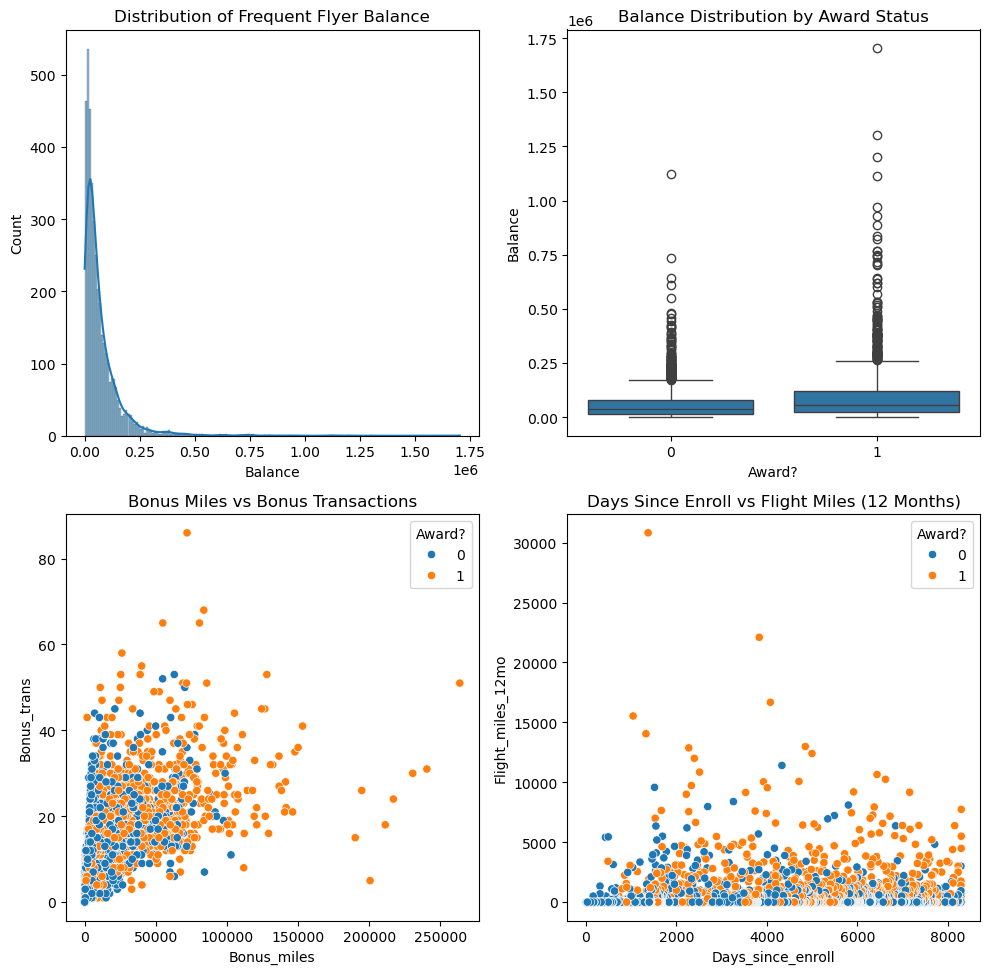

In [80]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(data=df , x='Balance', kde=True)
plt.title('Distribution of Frequent Flyer Balance')

plt.subplot(2,2,2)
sns.boxplot(x='Award?', y='Balance', data=df)
plt.title('Balance Distribution by Award Status')

plt.subplot(2,2,3)
sns.scatterplot(x='Bonus_miles', y='Bonus_trans', data=df, hue='Award?')
plt.title('Bonus Miles vs Bonus Transactions')

plt.subplot(2,2,4)
sns.scatterplot(x='Days_since_enroll', y='Flight_miles_12mo', data=df, hue='Award?')
plt.title('Days Since Enroll vs Flight Miles (12 Months)')

plt.tight_layout()
plt.show()

- Skewed with most passengers having low balances
- Similar balance distribution for award vs non-award
- Bonus miles have positive correlation with transactions

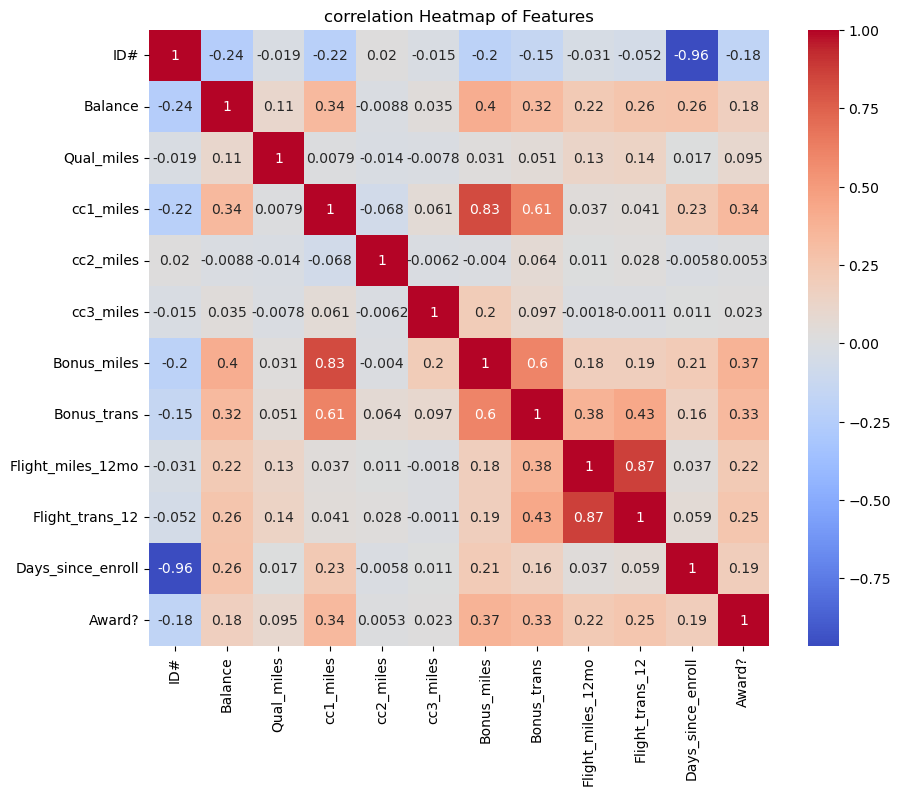

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr() ,annot=True ,cmap='coolwarm')
plt.title('correlation Heatmap of Features')
plt.show()

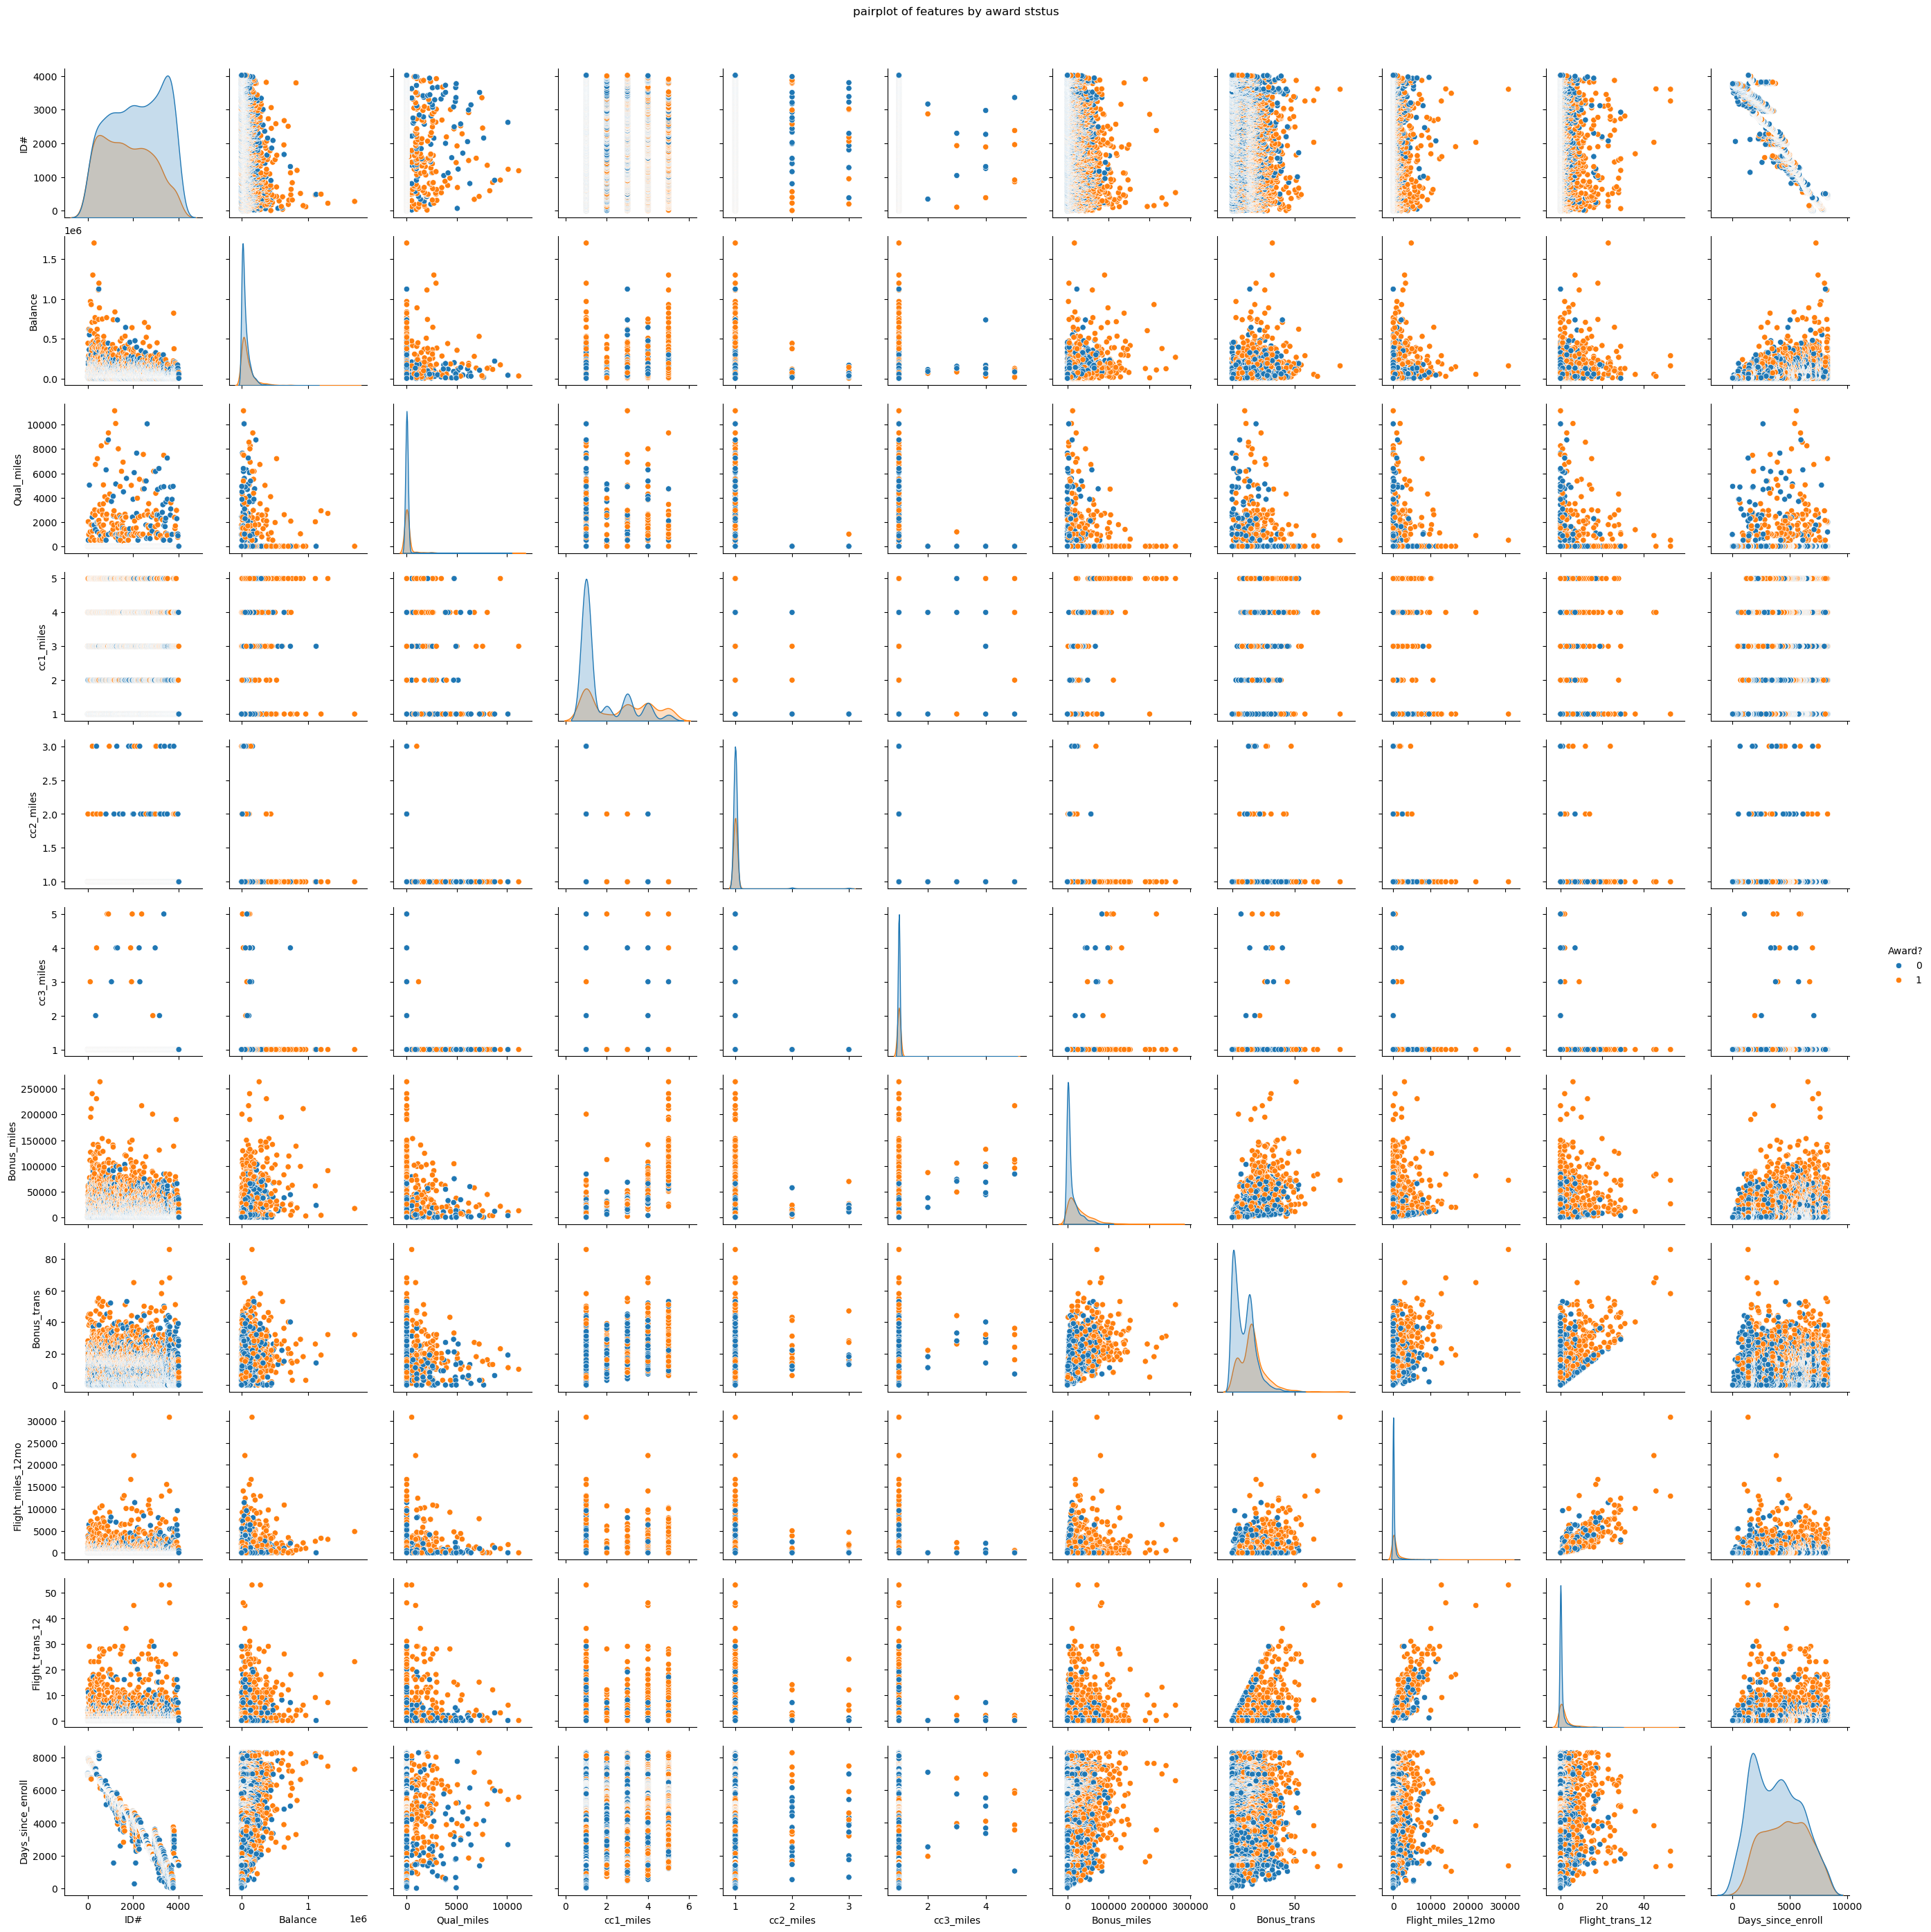

In [43]:
sns.pairplot(df,hue='Award?',diag_kind='kde')
plt.suptitle('pairplot of features by award ststus',y=1.02)
plt.show()

- There is a positive correlation, indicating that higher experience often corresponds to higher salaries
- The orange cluster suggests that individuals with more awards (possibly a higher count) tend to have higher salaries
- Age shows a slight positive trend with salary, though there's significant variability, indicating that salary may also depend on other factors
- There seems to be a positive relationship with more experience tend to win more awards
- The density plots show skewness in some features, such as salary and age, where most data points fall within a specific range (lower salaries, younger ages) 